# 24FS\_I4DS27: Adversarial Attacks - Wie kann KI überlistet werden? <br> 02-Models

In [1]:
%load_ext autoreload
%autoreload 2

import os
import warnings
os.chdir("../")

import matplotlib.pyplot as plt
from src.utils.evaluation import WeightsandBiasEval

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
ENTITY = "24FS_I4DS27"
PROJECT = "baselines"
evaluator = WeightsandBiasEval(entity_project_name=f"{ENTITY}/{PROJECT}")

In [3]:
runs_df = evaluator.runs_df
config = evaluator.config
last_runs = evaluator.get_last_runs()
best_epochs = evaluator.get_best_epochs()

In [4]:
display(best_epochs)

,id,model,dataset,epoch,lr,epochs,batch_size,weight_decay,p_dropout_classifier,first_unfreeze_epoch,...,train_BinaryRecall,train_BinarySpecificity,train_loss,val_BinaryAUROC,val_BinaryAccuracy,val_BinaryF1Score,val_BinaryPrecision,val_BinaryRecall,val_BinarySpecificity,val_loss
0,8lrqtb3y,vit_b_16,covidx_data,0,0.00100,50,32,0,0,NaN,...,0.048006,0.957143,7.151760,0.500000,0.499469,0.000000,0.000000,0.000000,1.000000,4.504904
1,t26xi89v,vit_b_16,covidx_data,7,0.00010,50,32,0,0,NaN,...,1.000000,0.000000,0.443835,0.546107,0.500531,0.667139,0.500531,1.000000,0.000000,0.816130
2,cr6yomzu,vit_b_16,covidx_data,32,0.00001,50,32,0,0,NaN,...,1.000000,0.000000,0.442365,0.636819,0.500531,0.667139,0.500531,1.000000,0.000000,0.858905
3,znmonkxw,vit_b_16,mri_data,38,0.00100,50,32,0,0,NaN,...,0.934881,0.769716,0.178846,0.954401,0.926573,0.956522,0.978814,0.935223,0.871795,0.176072
4,y08kwelt,vit_b_16,mri_data,49,0.00010,50,32,0,0,NaN,...,0.946996,0.681388,0.220816,0.920689,0.905594,0.946000,0.934783,0.957490,0.576923,0.214999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,syavtb54,resnet50,covidx_data,37,0.00010,50,32,0,0,NaN,...,0.974701,0.652651,0.209546,0.898205,0.819898,0.815745,0.835932,0.796510,0.843336,0.441539
74,h9zdsniz,resnet50,covidx_data,36,0.00001,50,32,0,0,NaN,...,0.981026,0.736746,0.168403,0.933595,0.872536,0.882096,0.821305,0.952606,0.792297,0.382026
75,whv9i5gm,resnet18,covidx_data,36,0.00100,50,32,0,0,NaN,...,0.979621,0.789762,0.139966,0.899371,0.820961,0.831050,0.787463,0.879745,0.762051,0.489463
76,wk2gp3dh,resnet18,covidx_data,32,0.00010,50,32,0,0,NaN,...,0.974350,0.789762,0.142859,0.926762,0.838192,0.848190,0.799582,0.903089,0.773157,0.431238


In [5]:
different_models = best_epochs["model"].unique()
different_datasets = best_epochs["dataset"].unique()

print(f"Trained Models: {different_models}")
print(f"Datasets: {different_datasets}")

Trained Models: ['vit_b_16' 'efficientnet_v2_m' 'efficientnet_v2_s' 'densenet169'
 'densenet121' 'resnet152' 'resnet50' 'resnet18' 'alexnet' 'vgg11'
 'efficientnet_v2_l' 'densenet201']
Datasets: ['covidx_data' 'mri_data']


In [6]:
def plot_best_models(best_epochs, visualization_metric="val_BinaryAUROC"):
    for dataset in best_epochs["dataset"].unique():
        temp = best_epochs[best_epochs["dataset"] == dataset]
        temp = temp.groupby("model").apply(lambda x: x.loc[x["val_loss"].idxmin()]).reset_index(drop=True)
        temp = temp.sort_values(by="model", ascending=False)

        plt.figure(figsize=(10, 5), dpi=200)
        plt.barh(y=temp["model"], width=temp[visualization_metric], color="grey", alpha=0.5)
        plt.title(f"{visualization_metric} for Dataset: {dataset}")
        plt.xlabel(f"{visualization_metric} of the best Model evaluated on val_loss")
        plt.ylabel("Model")
        if "BinaryAUROC" in visualization_metric:
            plt.vlines(x=0.5, ymin=-1, ymax=len(temp), color="red", linestyles="--", label="Random guess")
        plt.vlines(x=1, ymin=-1, ymax=len(temp), color="green", linestyles="--", label="Perfect score")
        plt.legend()
        plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
        plt.grid(axis="x", alpha=0.5)
        plt.show()

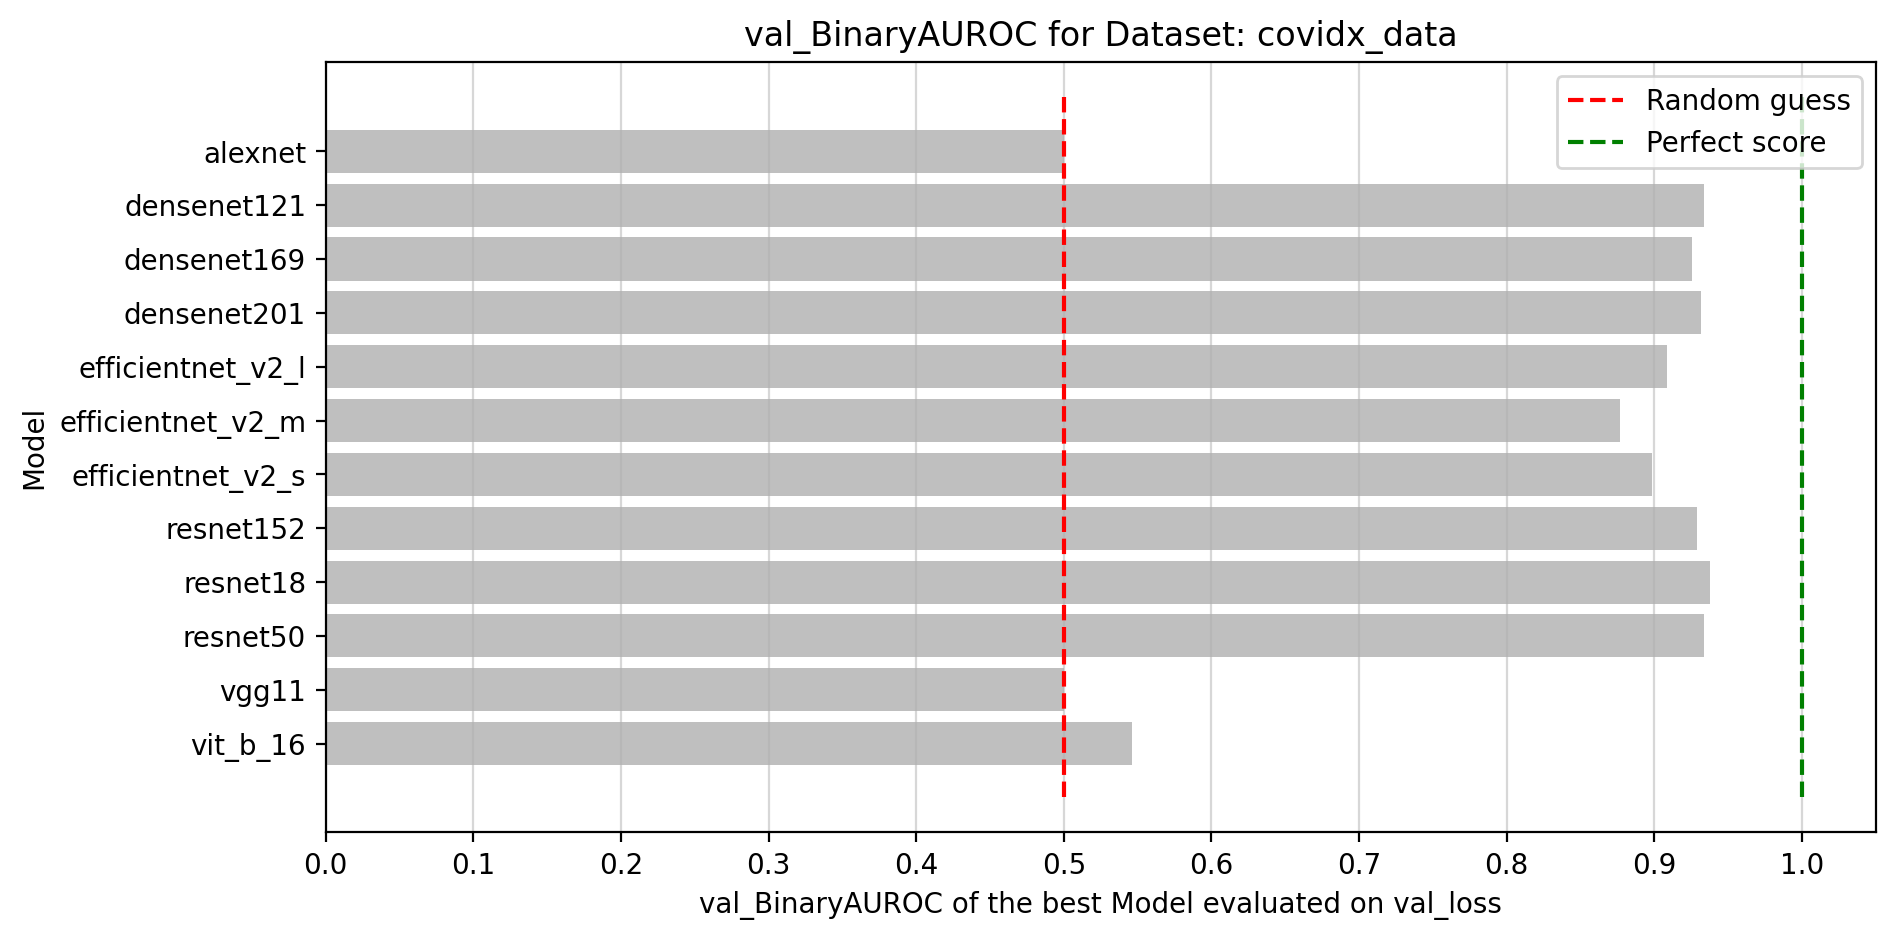

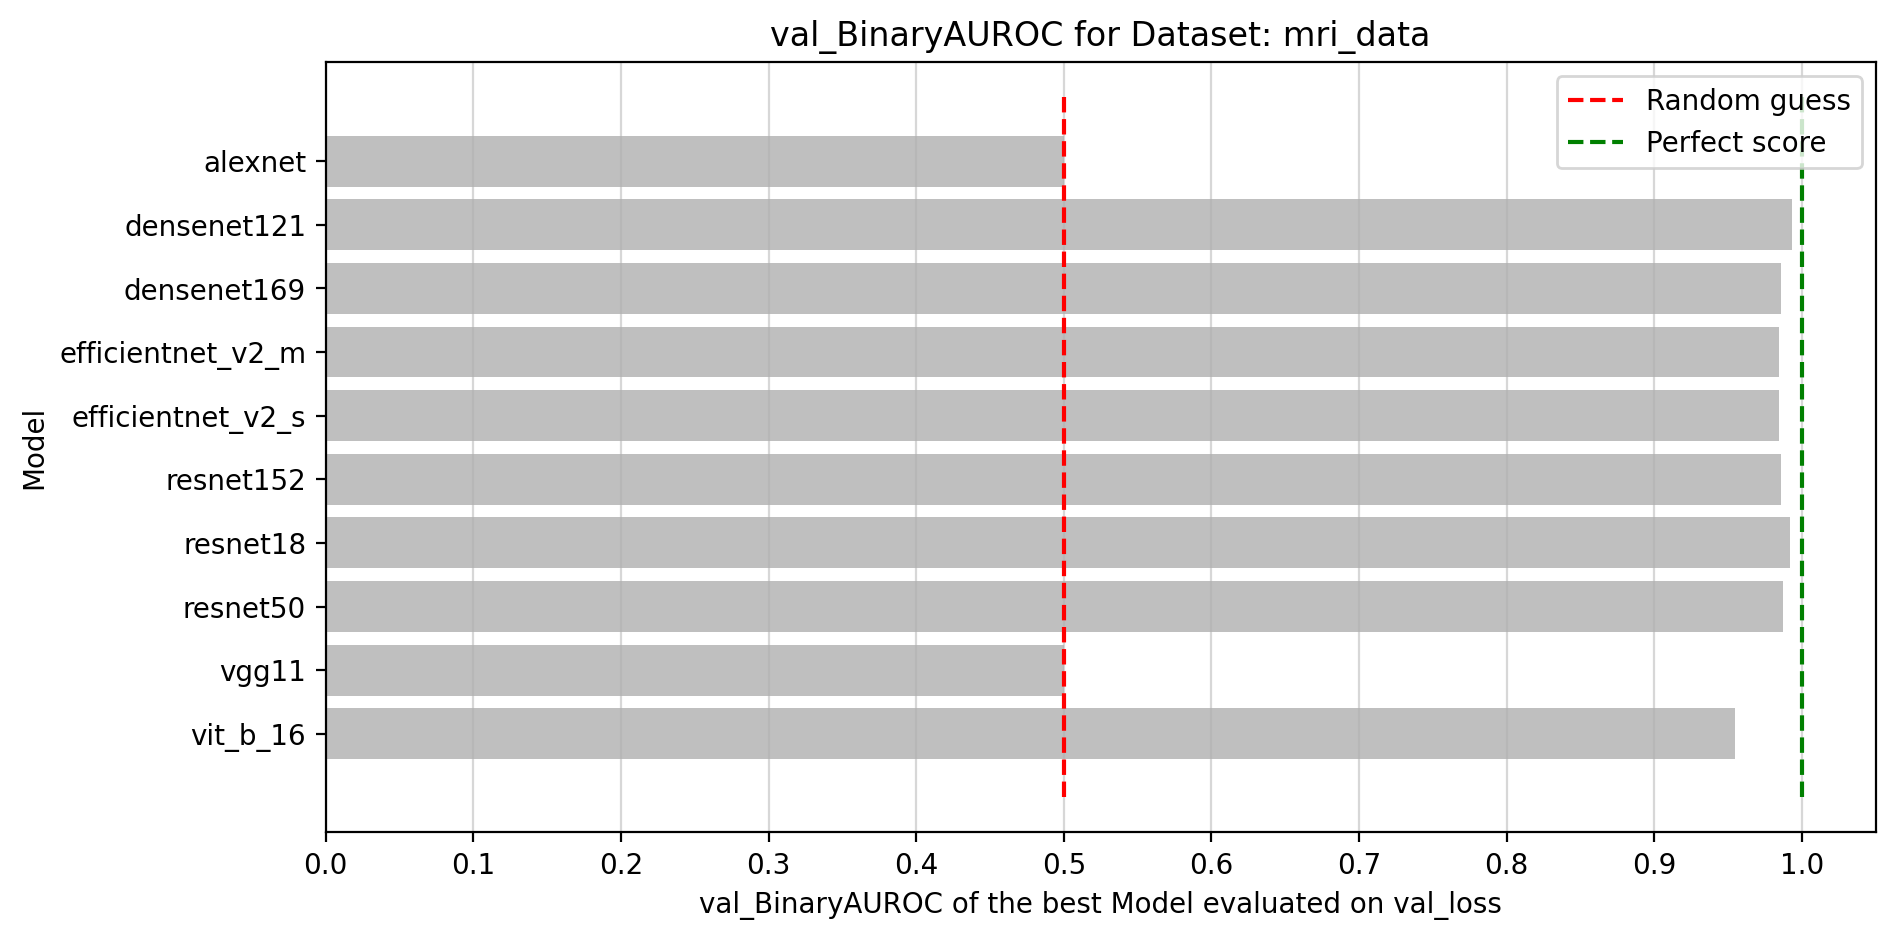

In [7]:
plot_best_models(best_epochs, visualization_metric="val_BinaryAUROC")

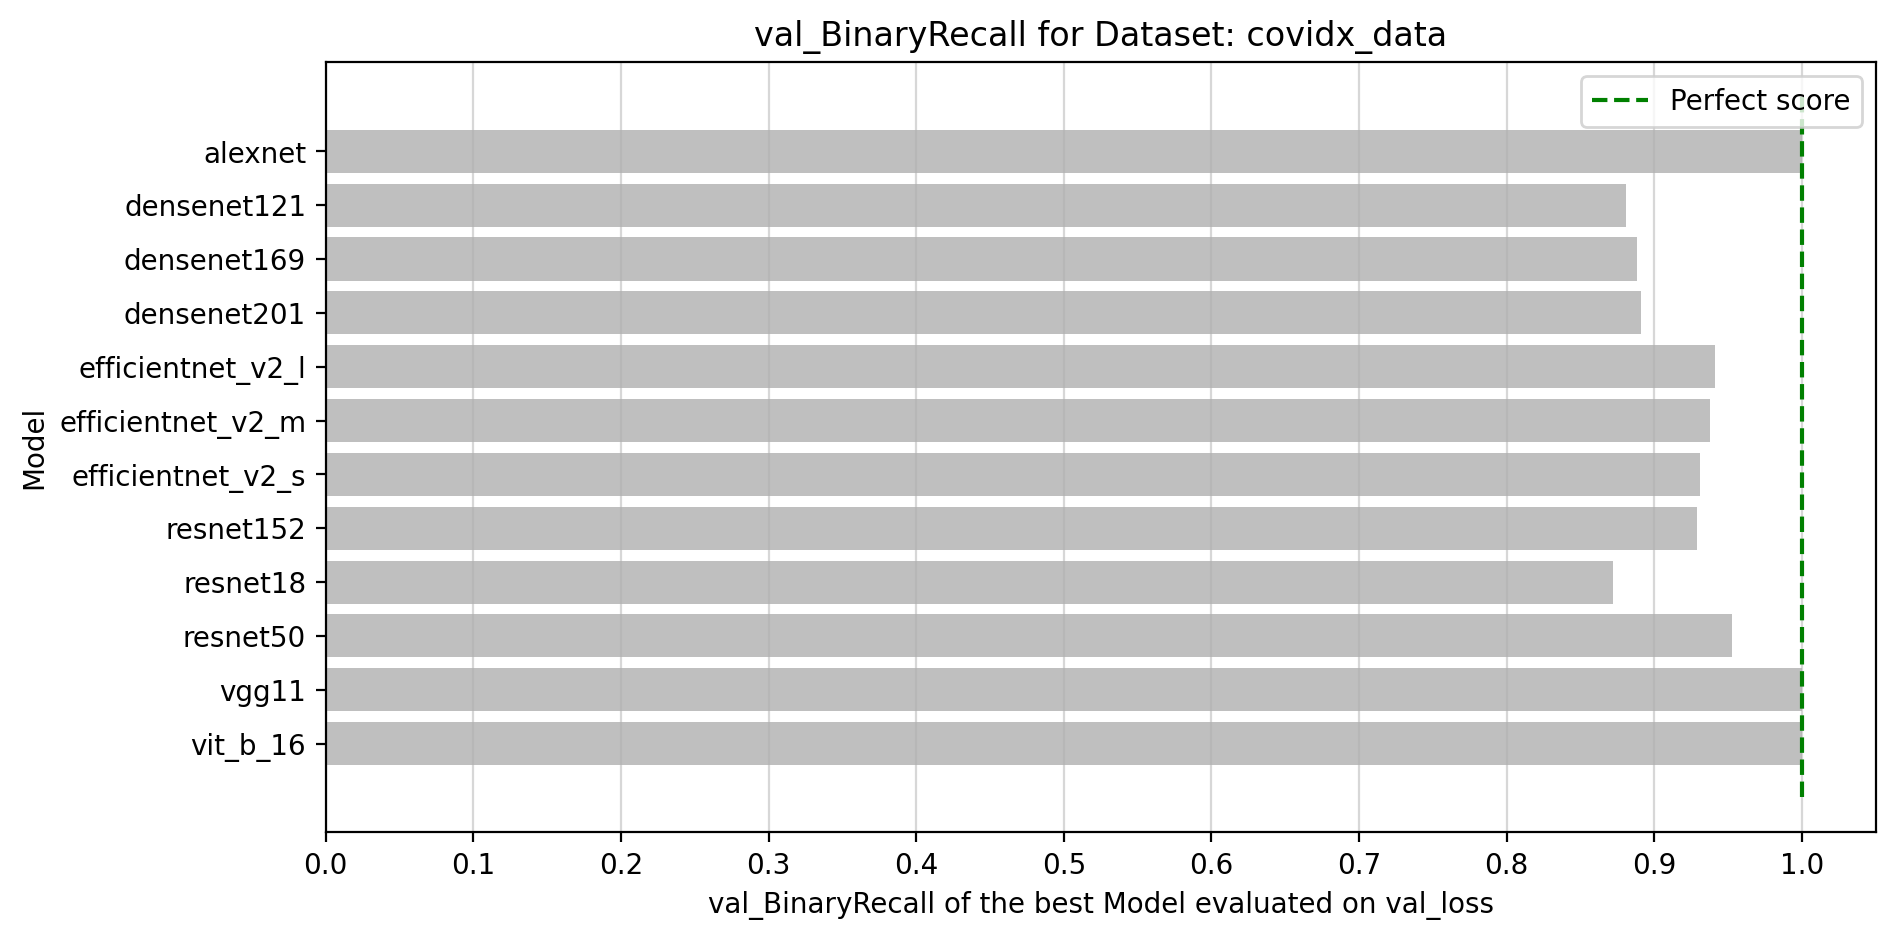

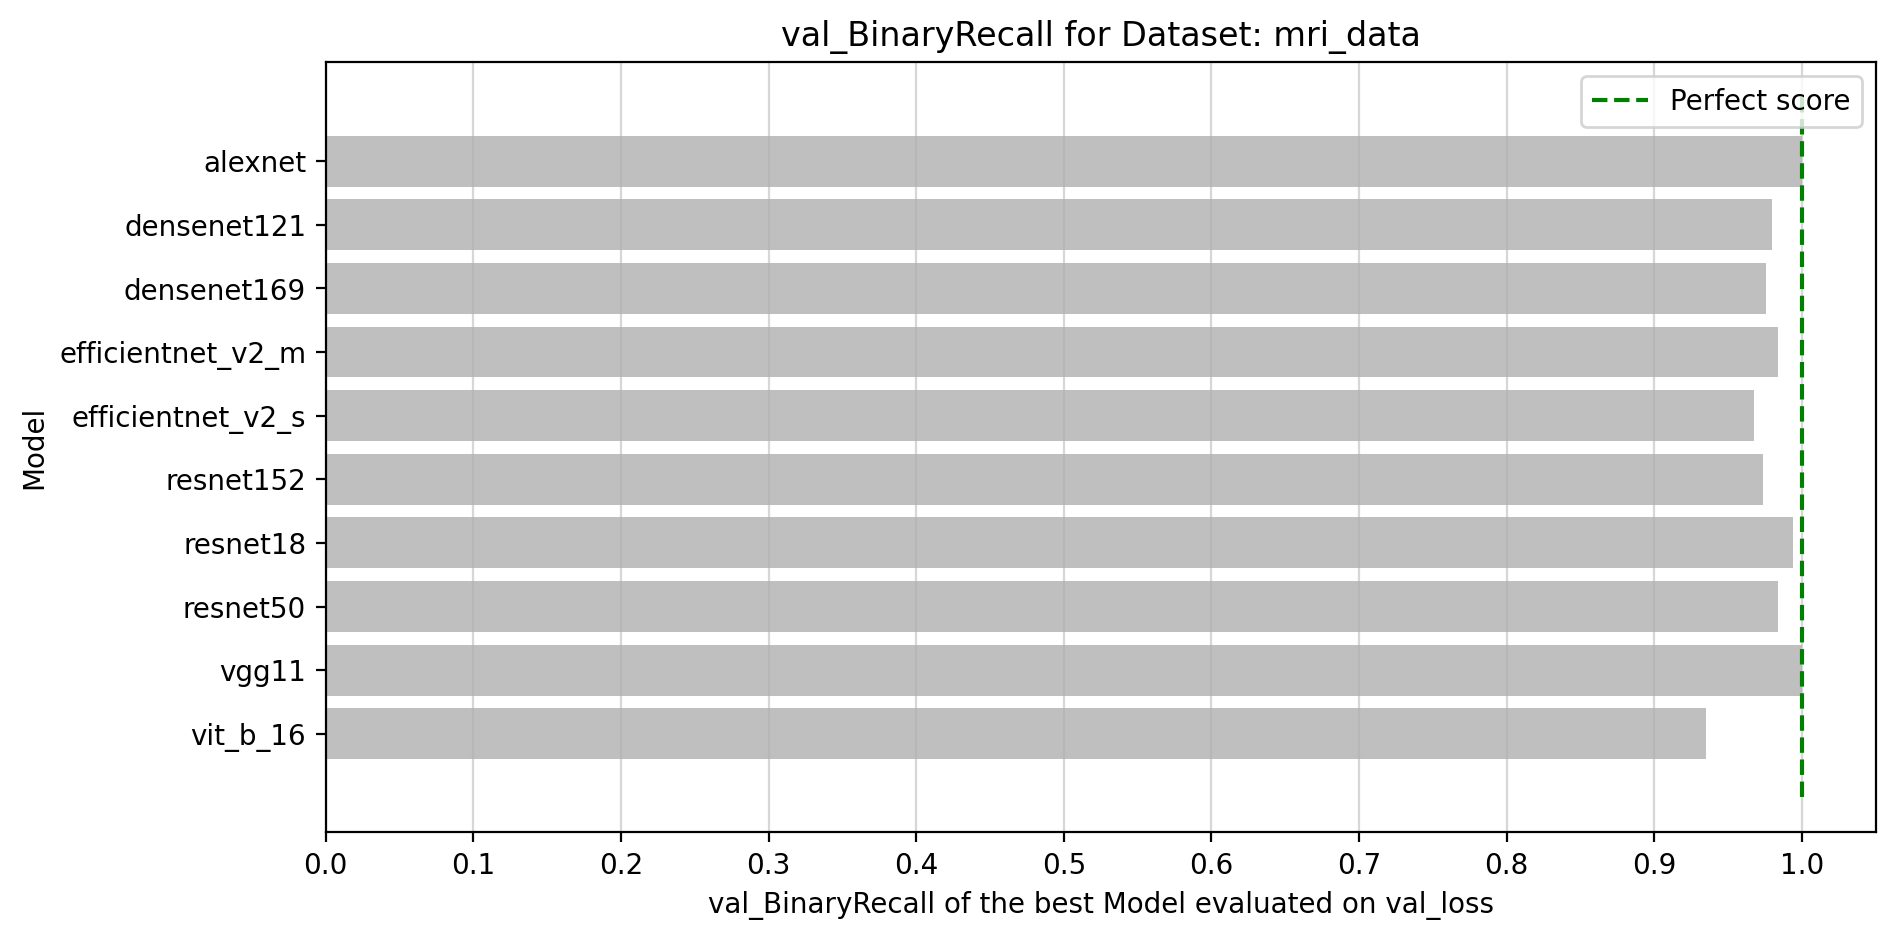

In [8]:
plot_best_models(best_epochs, visualization_metric="val_BinaryRecall")

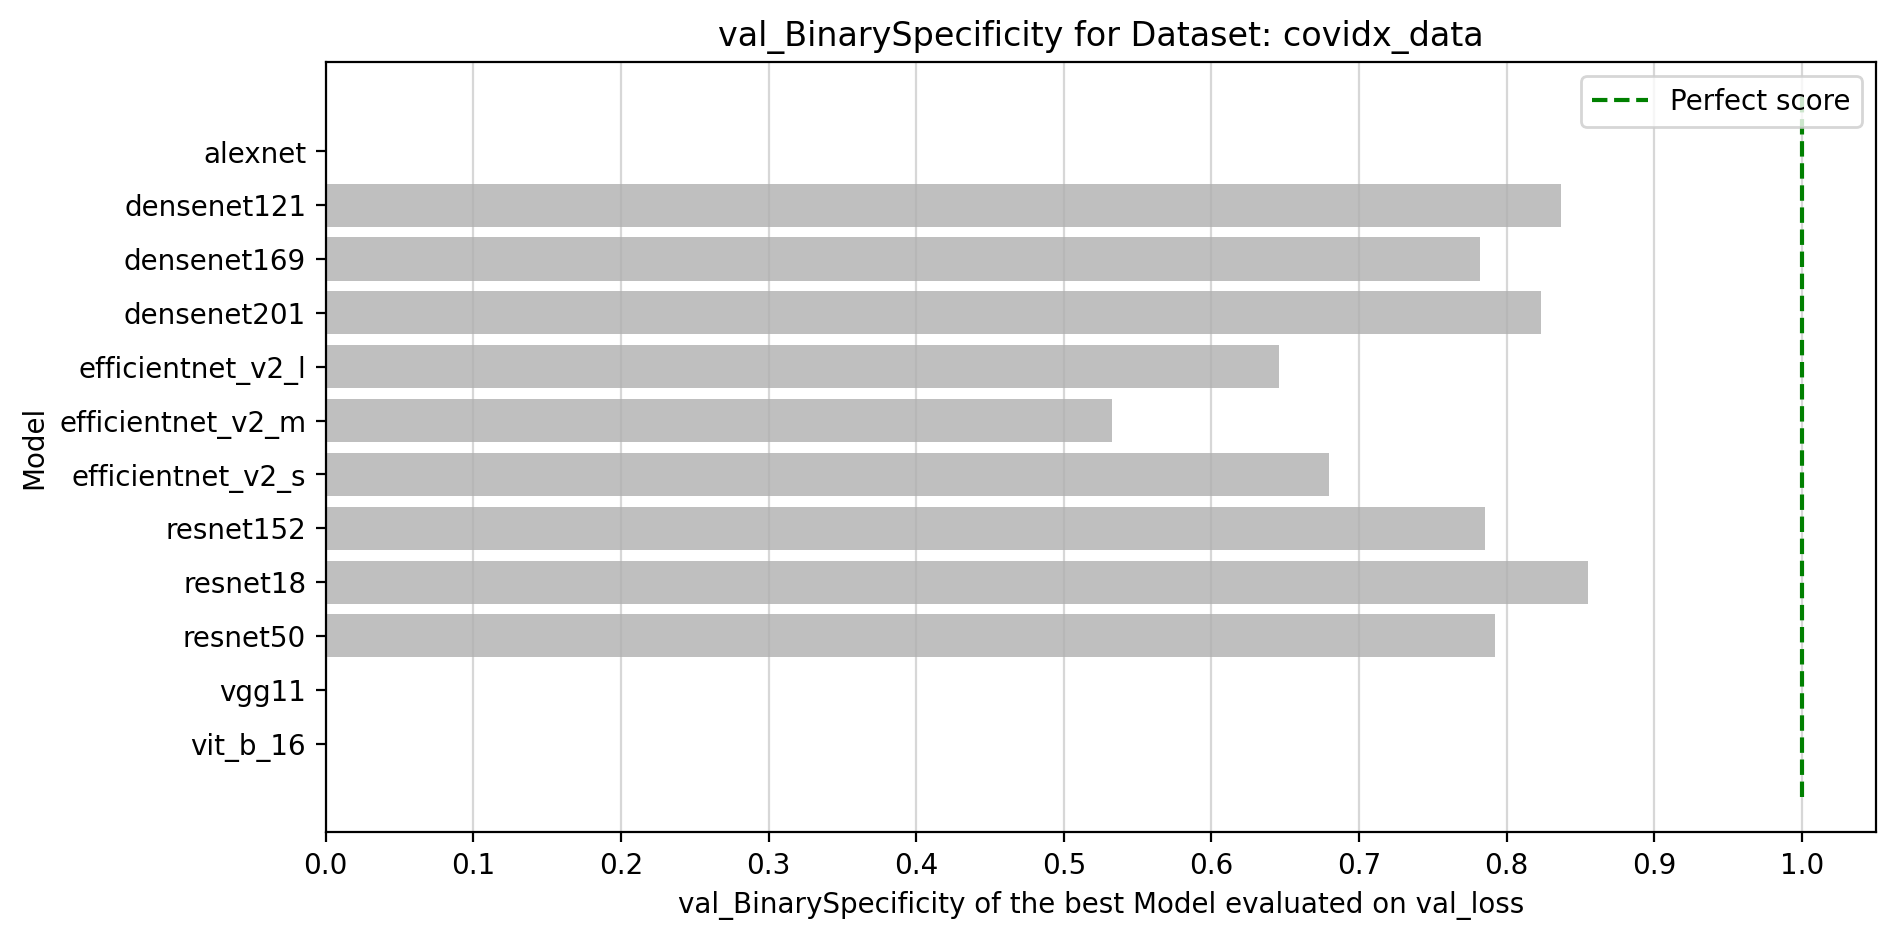

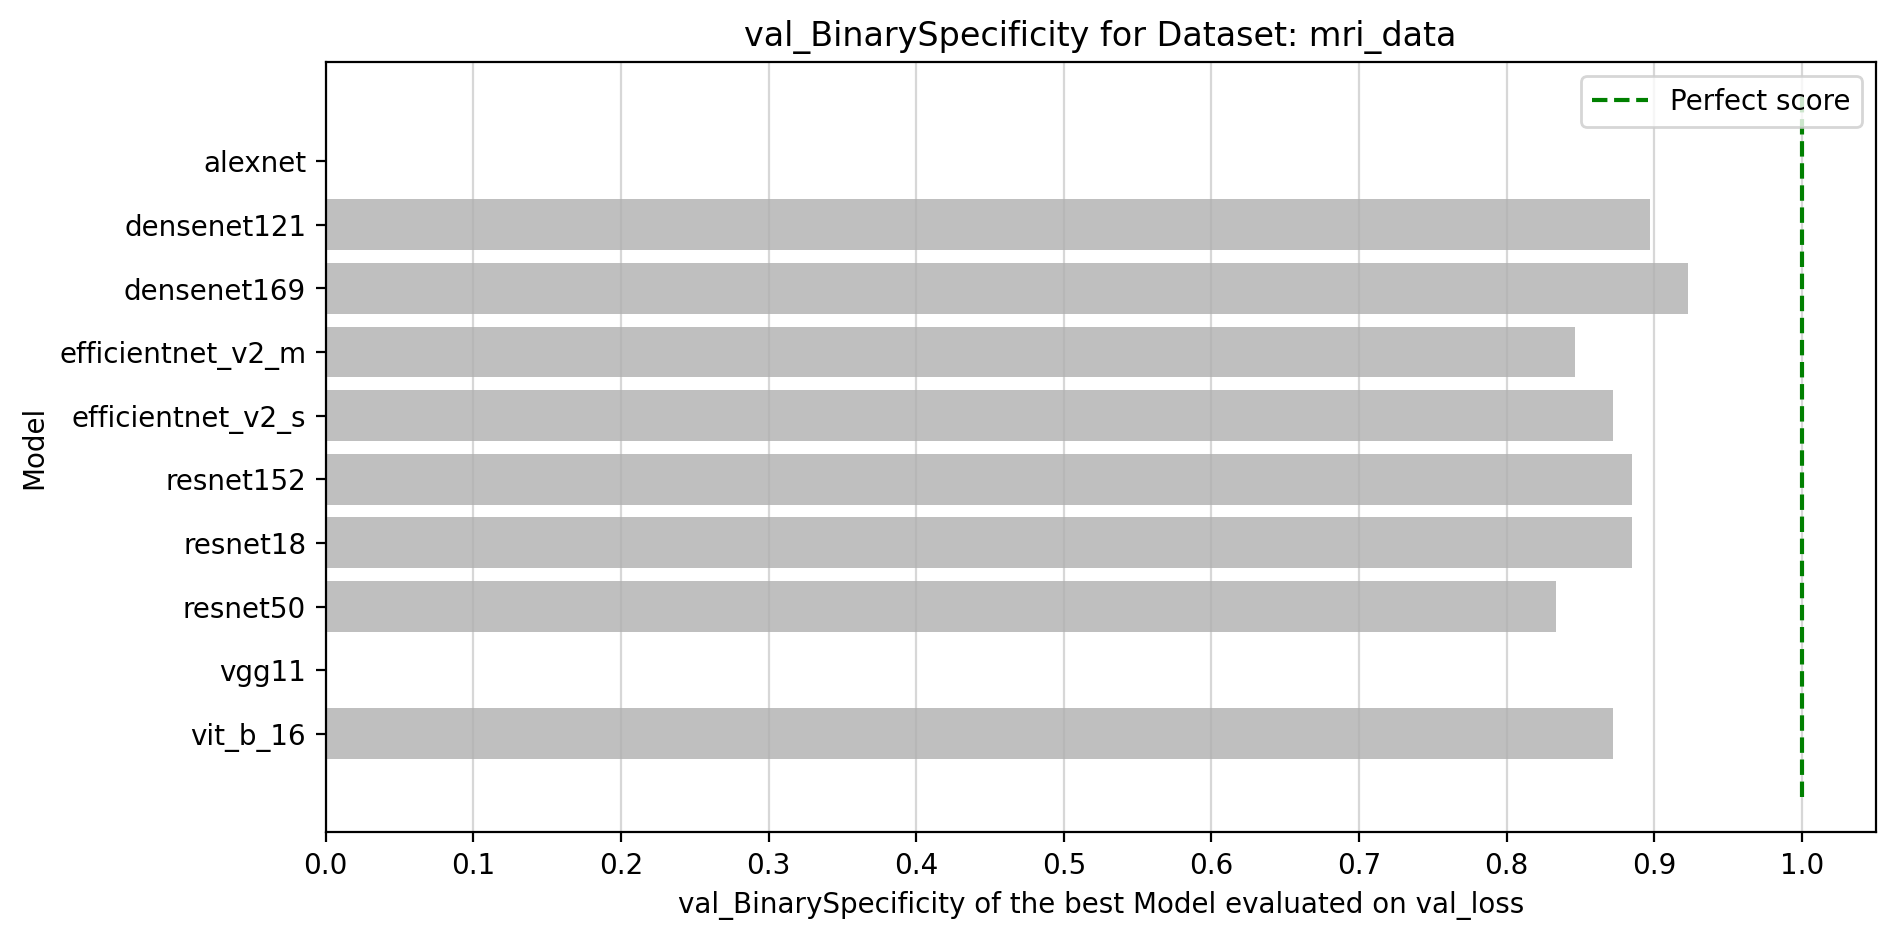

In [9]:
plot_best_models(best_epochs, visualization_metric="val_BinarySpecificity")